# **Measuring Bias in multiclass classification**


This tutorial will explain how to measure bias in a multiclass classification task using the holisticai library. We will introduce here some of the functions that can help study algorithmic bias.

The sections are organised as follows :
1. Load the data : we load the student dataset as a pandas DataFrame
2. Data Exploration : some preliminary analysis of the data
3. Train a Model : we train a model (sklearn)
4. Measure Bias : we compute a few bias metrics, and comment on their meaning

## **Load the data**

First of all, we need to import the required packages to perform our bias analysis and mitigation. You will need to have the `holisticai` package installed on your system, remember that you can install it by running: 
```bash
!pip install holisticai[all]
```

In [1]:
# Imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

The student dataset can be easily

In [2]:
from holisticai.datasets import load_dataset

dataset = load_dataset('student_multiclass')
dataset = dataset.map(lambda x: {'p_attr': x['p_attr']['sex']})
dataset

Dataset({
        features: ['X', 'p_attr', 'y'],
        num_rows: 395
    })

## **Data Exploration**

In [3]:
dataset['p_attr']

subfeatures,Fjob,Mjob,address,p_attr,sex
0,'teacher','at_home','U','F','F'
1,'other','at_home','U','F','F'
2,'other','at_home','U','F','F'
3,'services','health','U','F','F'
4,'other','other','U','F','F'
...,...,...,...,...,...
390,'services','services','U','M','M'
391,'services','services','U','M','M'
392,'other','other','R','M','M'
393,'other','services','R','M','M'


TypeError: input is not a numpy array or pandas series

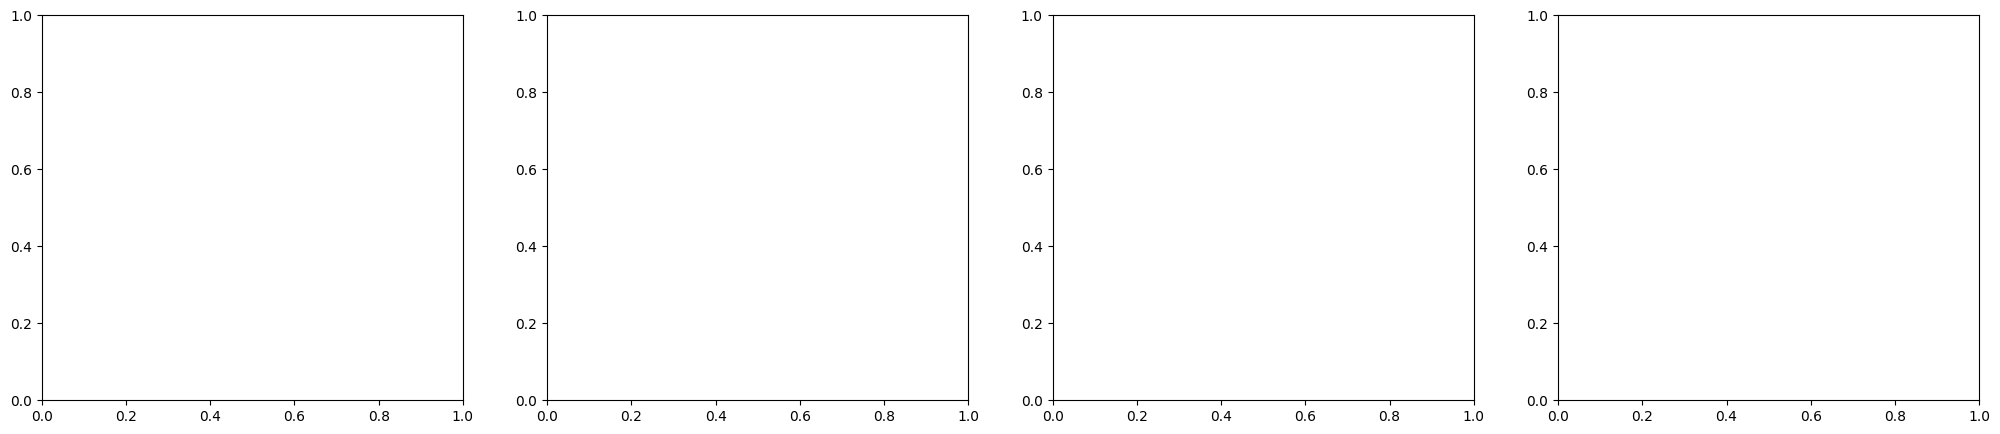

In [4]:
from holisticai.plots.bias import group_pie_plot
from holisticai.plots.bias import histogram_plot
from holisticai.plots.bias import frequency_matrix_plot
from holisticai.plots.bias import frequency_plot
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,4, figsize=(25,5))
group_pie_plot(dataset['p_attr'], ax=axs[0])
group_pie_plot(dataset['p_attr'], ax=axs[1])
histogram_plot(dataset['y'], ax=axs[2])
frequency_matrix_plot(dataset['p_attr'], dataset['y'], normalize='group', ax=axs[3])

In [ ]:
frequency_plot(dataset['p_attr'], dataset['y'])

## **Train a model**


In [ ]:
datasets = dataset.train_test_split(test_size=0.3)
datasets

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a simple Random Forest Classifier
x_train = datasets['train']['x']
y_train = datasets['train']['y']

model = RandomForestClassifier(random_state=111)
model.fit(x_train, y_train)

# Predict values
x_test = datasets['test']['x']
y_test = datasets['test']['y']
p_attr_test = datasets['test']['p_attr']
y_pred = model.predict(x_test)

In [ ]:
from holisticai.metrics.bias import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
confusion_matrix(y_pred, y_test)

In [ ]:
# evaluate
print (accuracy_score(y_test, y_pred))
print (precision_score(y_test, y_pred, average=None))
print (recall_score(y_test, y_pred, average=None))

## **Measure bias**

In [ ]:
from holisticai.plots.bias import frequency_matrix_plot
from holisticai.plots.bias import frequency_plot

In [ ]:
y_pred = model.predict(x_test)   # multiclass prediction vector                                                 # multiclass label vector

In [ ]:
frequency_matrix_plot(p_attr_test, y_pred, normalize='group')

Using the above plot, we observe unfairness by looking at differences over columns. For instance we look at the class 1.0, and observe how the 'health' group has a much higher probability of being within it.

In [ ]:
frequency_plot(p_attr_test, y_pred)

This is the same data as the previous plot, but displayed in a different way.

Let's compute a few bias metrics. We have generalised versions of '1d' bias metrics. For instance multiclass statistical parity.

In [ ]:
from holisticai.metrics.bias import multiclass_statistical_parity

multiclass_statistical_parity(
    p_attr_test, y_pred, groups=None, classes=None, aggregation_fun="mean"
)

We now compute statistical parity, generalized for the multiclass case. We aggregate by taking the average multilabel statistical parity over all possible group pairs (`aggregation_fun="mean"`). As in the 1d case, the suggested accepted range is (-0.1, 0.1).

In [ ]:
multiclass_statistical_parity(
    p_attr_test, y_pred, groups=None, classes=None, aggregation_fun="max"
)

Alternatively, we could aggregate by taking the maximum (`aggregation_fun="max"`) over all possible group pairs. As expected, the maximum statistical parity is higher in this case.

We can try another bias metric, for instace multiclass_equality_of_opp is the multidimensional version of the 1d equal opportunity metric.

In [ ]:
from holisticai.metrics.bias import multiclass_equality_of_opp

multiclass_equality_of_opp(
    p_attr_test, y_pred, y_test, groups=None, classes=None, aggregation_fun="mean"
)

In [ ]:
multiclass_equality_of_opp(
    p_attr_test, y_pred, y_test, groups=None, classes=None, aggregation_fun="max"
)

In [ ]:
from holisticai.metrics.bias import multiclass_bias_metrics
multiclass_bias_metrics(p_attr_test, y_pred, y_test, metric_type='both')